In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars_df = pd.read_csv("car_data.csv")
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(cars_df.shape)
cars_df.columns

(301, 9)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
cars_df["Car_Name"].nunique()

98

In [6]:
cars_df["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
cars_df["Car_Brand"] = cars_df["Car_Name"].apply(lambda x: x.split(" ")[0])
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Brand
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


In [8]:
cars_df["Car_Brand"].nunique()

44

In [9]:
brand_counts = cars_df.groupby("Car_Brand")["Car_Name"].count()
brand_counts.head()

Car_Brand
800        1
Activa     3
Bajaj     25
Hero      15
Honda     17
Name: Car_Name, dtype: int64

In [10]:
min_threshold = 6
rare_brands = brand_counts[brand_counts < min_threshold].index
rare_brands

Index(['800', 'Activa', 'Hyosung', 'KTM', 'Mahindra', 'Suzuki', 'UM', 'baleno',
       'camry', 'creta', 'dzire', 'elantra', 'i10', 'ignis', 'land', 'omni',
       'ritz', 's', 'swift', 'vitara', 'wagon', 'xcent'],
      dtype='object', name='Car_Brand')

In [11]:
cars_df["Car_Brand"] = cars_df["Car_Brand"].replace(rare_brands, "Other")
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Brand
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Other
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Other
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Other


In [12]:
cars_df["Car_Brand"].nunique()

23

In [13]:
brand_dummies = pd.get_dummies(cars_df["Car_Brand"], prefix="Brand").astype(int)
brand_dummies.head()

,Brand_Bajaj,Brand_Hero,Brand_Honda,Brand_Other,Brand_Royal,Brand_TVS,Brand_Yamaha,Brand_alto,Brand_amaze,Brand_brio,...,Brand_eon,Brand_ertiga,Brand_etios,Brand_fortuner,Brand_grand,Brand_i20,Brand_innova,Brand_jazz,Brand_sx4,Brand_verna
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
cars_df_1 = pd.concat([cars_df.drop(["Car_Name", "Car_Brand"], axis=1), brand_dummies], axis=1)
cars_df_1.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand_Bajaj,Brand_Hero,...,Brand_eon,Brand_ertiga,Brand_etios,Brand_fortuner,Brand_grand,Brand_i20,Brand_innova,Brand_jazz,Brand_sx4,Brand_verna
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
cars_df_1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Brand_Bajaj', 'Brand_Hero',
       'Brand_Honda', 'Brand_Other', 'Brand_Royal', 'Brand_TVS',
       'Brand_Yamaha', 'Brand_alto', 'Brand_amaze', 'Brand_brio', 'Brand_ciaz',
       'Brand_city', 'Brand_corolla', 'Brand_eon', 'Brand_ertiga',
       'Brand_etios', 'Brand_fortuner', 'Brand_grand', 'Brand_i20',
       'Brand_innova', 'Brand_jazz', 'Brand_sx4', 'Brand_verna'],
      dtype='object')

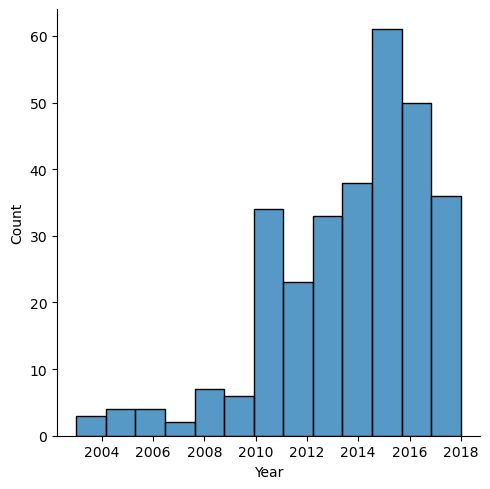

In [16]:
sns.displot(cars_df_1["Year"])
plt.show()

In [41]:
min_year = cars_df_1["Year"].min()
min_year

2003

In [43]:
cars_df_1["Year"] = cars_df_1["Year"] - min_year

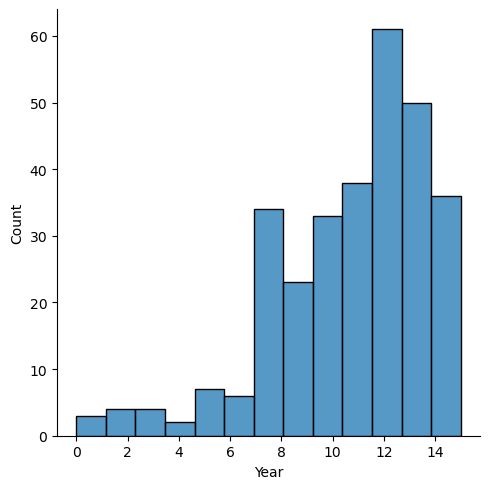

In [45]:
sns.displot(cars_df_1["Year"])
plt.show()

In [51]:
cars_df_1[["Selling_Price", "Year"]].corr()

,Selling_Price,Year
Selling_Price,1.000000,0.236141
Year,0.236141,1.000000


In [53]:
cars_df_1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Brand_Bajaj', 'Brand_Hero',
       'Brand_Honda', 'Brand_Other', 'Brand_Royal', 'Brand_TVS',
       'Brand_Yamaha', 'Brand_alto', 'Brand_amaze', 'Brand_brio', 'Brand_ciaz',
       'Brand_city', 'Brand_corolla', 'Brand_eon', 'Brand_ertiga',
       'Brand_etios', 'Brand_fortuner', 'Brand_grand', 'Brand_i20',
       'Brand_innova', 'Brand_jazz', 'Brand_sx4', 'Brand_verna'],
      dtype='object')

In [55]:
cars_df_1["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [61]:
fuel_type_dummies = pd.get_dummies(cars_df_1["Fuel_Type"], prefix="Fuel_Type", drop_first=True).astype(int)
fuel_type_dummies.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [63]:
cars_df_2 = pd.concat([cars_df_1.drop("Fuel_Type", axis=1), fuel_type_dummies], axis=1)
cars_df_2.head()

,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Brand_Bajaj,Brand_Hero,Brand_Honda,...,Brand_etios,Brand_fortuner,Brand_grand,Brand_i20,Brand_innova,Brand_jazz,Brand_sx4,Brand_verna,Fuel_Type_Diesel,Fuel_Type_Petrol
0,11,3.35,5.59,27000,Dealer,Manual,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,4.75,9.54,43000,Dealer,Manual,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,14,7.25,9.85,6900,Dealer,Manual,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,2.85,4.15,5200,Dealer,Manual,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11,4.60,6.87,42450,Dealer,Manual,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
cars_df_2["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [69]:
transmission_dummies = pd.get_dummies(cars_df_1["Transmission"], prefix="Transmission").astype(int)
transmission_dummies.head()

,Transmission_Automatic,Transmission_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [71]:
cars_df_3 = pd.concat([cars_df_2.drop("Transmission", axis=1), transmission_dummies], axis=1)
cars_df_3.head()

,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Owner,Brand_Bajaj,Brand_Hero,Brand_Honda,Brand_Other,...,Brand_grand,Brand_i20,Brand_innova,Brand_jazz,Brand_sx4,Brand_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,11,3.35,5.59,27000,Dealer,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,10,4.75,9.54,43000,Dealer,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,14,7.25,9.85,6900,Dealer,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,8,2.85,4.15,5200,Dealer,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,11,4.60,6.87,42450,Dealer,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [75]:
cars_df_2["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [79]:
selling_type_dummies = pd.get_dummies(cars_df_1["Selling_type"], prefix="Selling_Type").astype(int)
selling_type_dummies.head()

,Selling_Type_Dealer,Selling_Type_Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [85]:
cars_df_4 = pd.concat([cars_df_3.drop("Selling_type", axis=1), selling_type_dummies], axis=1)
cars_df_4.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Brand_Bajaj,Brand_Hero,Brand_Honda,Brand_Other,Brand_Royal,...,Brand_innova,Brand_jazz,Brand_sx4,Brand_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Selling_Type_Dealer,Selling_Type_Individual
0,11,3.35,5.59,27000,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,10,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
2,14,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,8,2.85,4.15,5200,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,11,4.60,6.87,42450,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0


In [87]:
cars_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     301 non-null    int64  
 1   Selling_Price            301 non-null    float64
 2   Present_Price            301 non-null    float64
 3   Driven_kms               301 non-null    int64  
 4   Owner                    301 non-null    int64  
 5   Brand_Bajaj              301 non-null    int32  
 6   Brand_Hero               301 non-null    int32  
 7   Brand_Honda              301 non-null    int32  
 8   Brand_Other              301 non-null    int32  
 9   Brand_Royal              301 non-null    int32  
 10  Brand_TVS                301 non-null    int32  
 11  Brand_Yamaha             301 non-null    int32  
 12  Brand_alto               301 non-null    int32  
 13  Brand_amaze              301 non-null    int32  
 14  Brand_brio               3

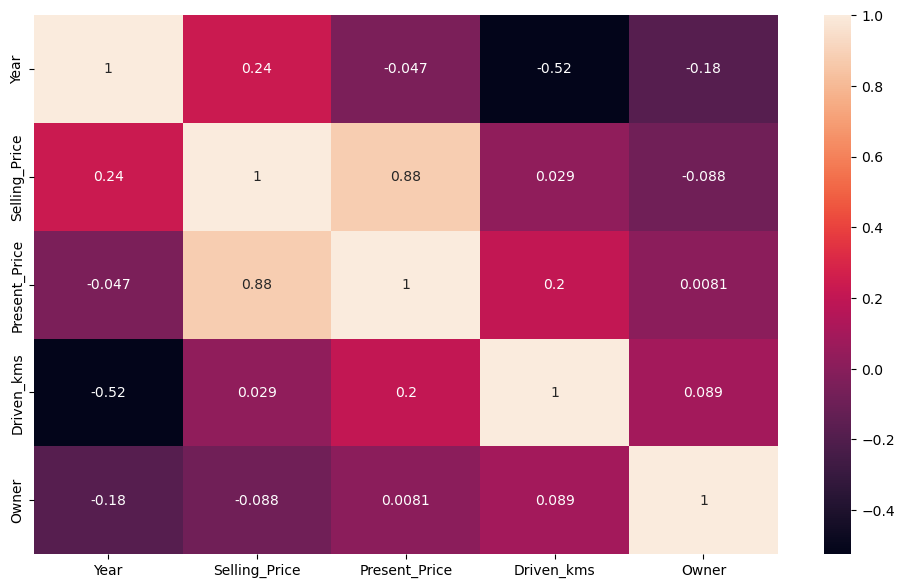

In [91]:
plt.figure(figsize=(12,7))
sns.heatmap(cars_df_4[["Year", "Selling_Price", "Present_Price", "Driven_kms", "Owner"]].corr(), annot=True)
plt.show()

In [93]:
cars_df_4["Driven_kms_log"] = np.log1p(cars_df_4["Driven_kms"])

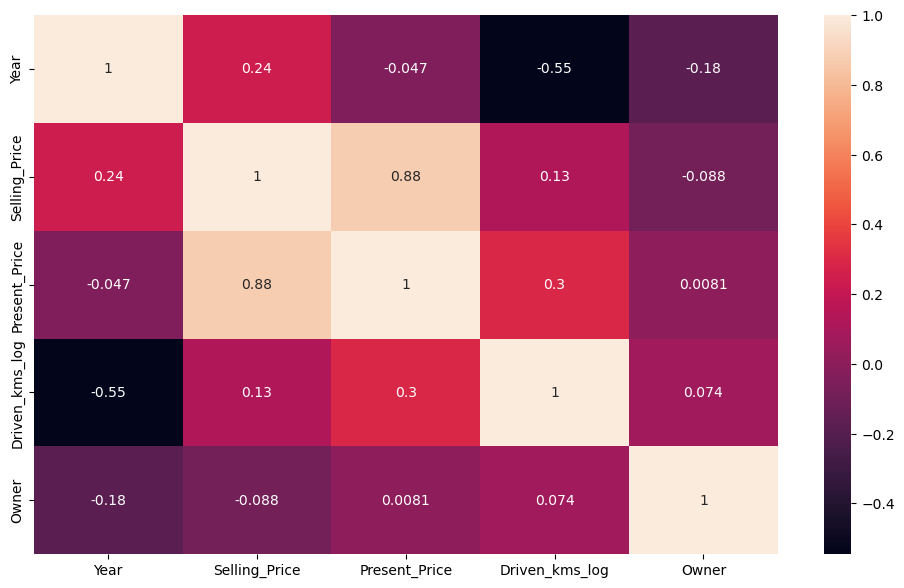

In [95]:
plt.figure(figsize=(12,7))
sns.heatmap(cars_df_4[["Year", "Selling_Price", "Present_Price", "Driven_kms_log", "Owner"]].corr(), annot=True)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
y = cars_df_4["Selling_Price"]
X = cars_df_4.drop(["Selling_Price", "Driven_kms"], axis=1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.907445722373273

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [111]:
model_params = {
    "linear_reg": {
        "model": LinearRegression(),
        "params": {
            "linearregression__fit_intercept": [True]
        }
    },
    "random_forest": {
        "model": RandomForestRegressor(),
        "params": {
            "randomforestregressor__n_estimators": [2, 8, 16, 32],
            "randomforestregressor__min_samples_split": [2, 4, 8, 16],
            "randomforestregressor__max_depth": [2, 4, 6, 8],
            "randomforestregressor__min_samples_leaf": [1, 3, 5, 7]
        }
    },
    "decision_tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "decisiontreeregressor__min_samples_split": [2, 4, 8, 16],
            "decisiontreeregressor__max_depth": [2, 4, 6, 8],
            "decisiontreeregressor__min_samples_leaf": [1, 3, 5, 7]
        }
    }
}

In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


best_estimators = {}
scores = []


for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    clf = GridSearchCV(pipe, mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        "model": algo,
        "best_params": clf.best_params_,
        "best_score": clf.best_score_
    })
    best_estimators[algo] = clf.best_estimator_


model_df = pd.DataFrame(scores, columns=["model", "best_params", "best_score"])
model_df

,model,best_params,best_score
0,linear_reg,{'linearregression__fit_intercept': True},0.836566
1,random_forest,"{'randomforestregressor__max_depth': 8, 'rando...",0.861240
2,decision_tree,"{'decisiontreeregressor__max_depth': 8, 'decis...",0.801781


In [125]:
cars_df_4.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Brand_Bajaj', 'Brand_Hero', 'Brand_Honda', 'Brand_Other',
       'Brand_Royal', 'Brand_TVS', 'Brand_Yamaha', 'Brand_alto', 'Brand_amaze',
       'Brand_brio', 'Brand_ciaz', 'Brand_city', 'Brand_corolla', 'Brand_eon',
       'Brand_ertiga', 'Brand_etios', 'Brand_fortuner', 'Brand_grand',
       'Brand_i20', 'Brand_innova', 'Brand_jazz', 'Brand_sx4', 'Brand_verna',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Selling_Type_Dealer', 'Selling_Type_Individual',
       'Driven_kms_log'],
      dtype='object')

In [127]:
col_dict = {}

for col in X_train.columns:
    col_dict[col] = 0

col_dict

{'Year': 0,
 'Present_Price': 0,
 'Owner': 0,
 'Brand_Bajaj': 0,
 'Brand_Hero': 0,
 'Brand_Honda': 0,
 'Brand_Other': 0,
 'Brand_Royal': 0,
 'Brand_TVS': 0,
 'Brand_Yamaha': 0,
 'Brand_alto': 0,
 'Brand_amaze': 0,
 'Brand_brio': 0,
 'Brand_ciaz': 0,
 'Brand_city': 0,
 'Brand_corolla': 0,
 'Brand_eon': 0,
 'Brand_ertiga': 0,
 'Brand_etios': 0,
 'Brand_fortuner': 0,
 'Brand_grand': 0,
 'Brand_i20': 0,
 'Brand_innova': 0,
 'Brand_jazz': 0,
 'Brand_sx4': 0,
 'Brand_verna': 0,
 'Fuel_Type_Diesel': 0,
 'Fuel_Type_Petrol': 0,
 'Transmission_Automatic': 0,
 'Transmission_Manual': 0,
 'Selling_Type_Dealer': 0,
 'Selling_Type_Individual': 0,
 'Driven_kms_log': 0}